In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_csv('AirPassengers.csv')

In [3]:
df.head(5)

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
df=pd.read_csv('AirPassengers.csv', parse_dates = ['Month'], index_col='Month')

In [7]:
df.head(5)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### Exploratory Data Analysis

<Axes: xlabel='Month'>

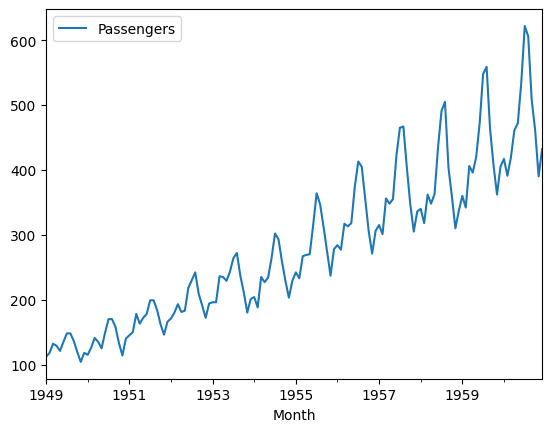

In [8]:
df.plot()

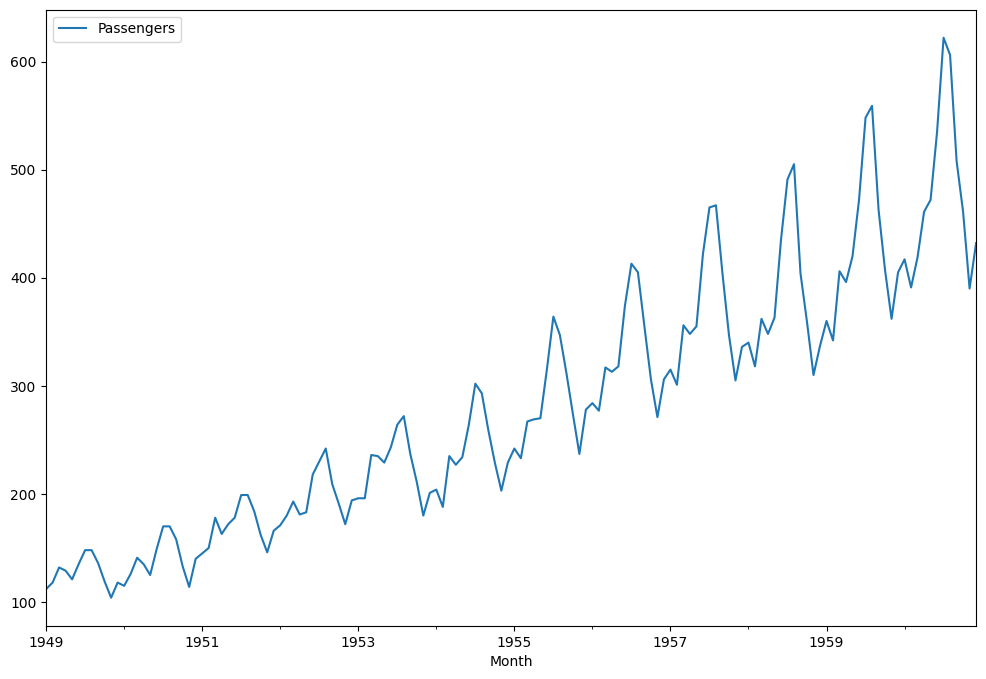

In [9]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
df.plot()
plt.show()

### Decomposing the Time Series

In [10]:
Add_decomposition = seasonal_decompose(df, model = 'additive', period= 12 )

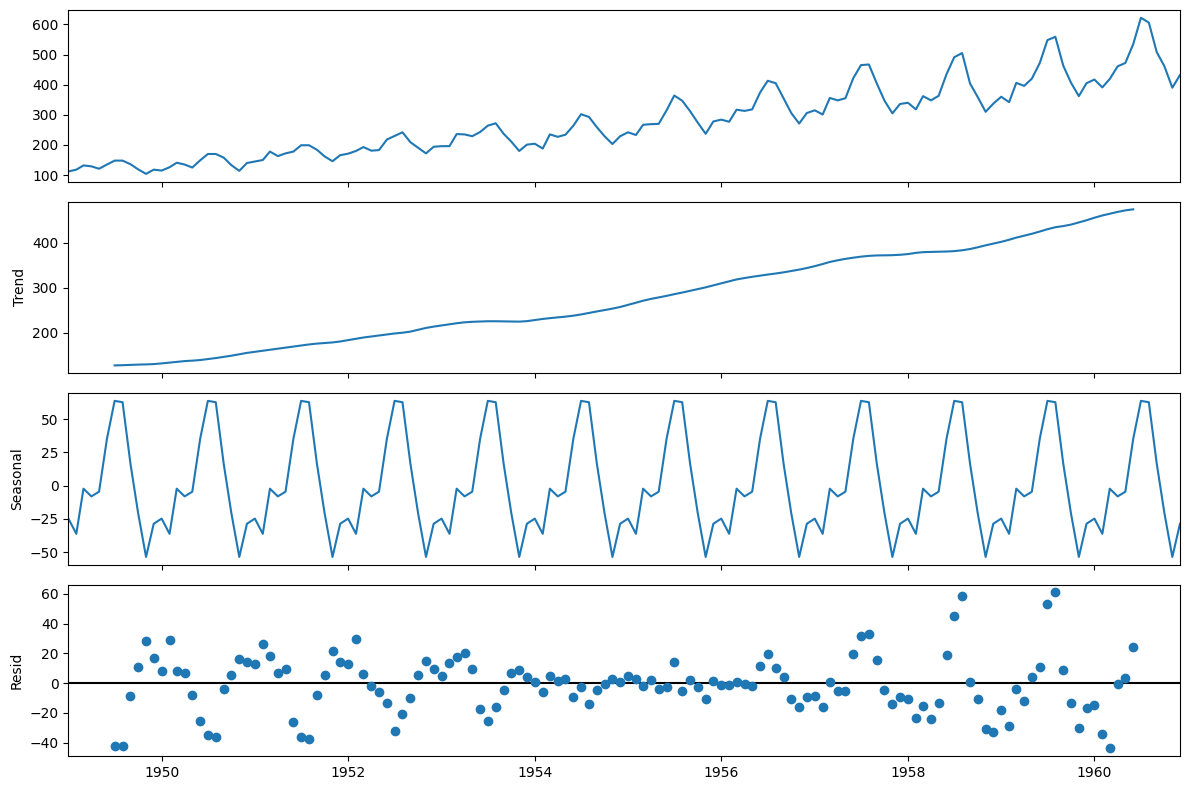

In [11]:
rcParams['figure.figsize'] = 12,8
Add_decomposition.plot()
plt.show()

In [12]:
Mul_decomposition = seasonal_decompose(df, model = 'multiplicative', period= 12 )

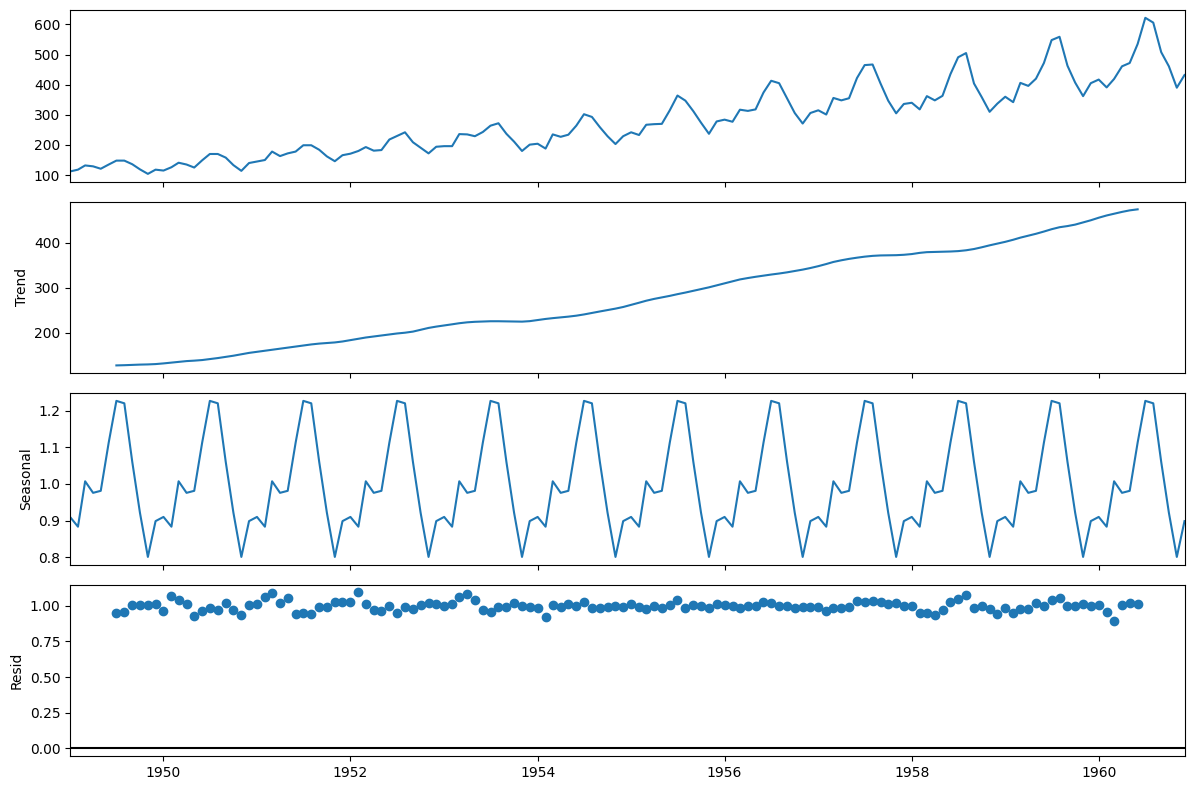

In [13]:
rcParams['figure.figsize'] = 12,8
Mul_decomposition.plot()
plt.show()

### Trend , Seasonality, Residual

In [14]:
trend_ad = Add_decomposition.trend
seasonality_ad = Add_decomposition.seasonal
residual_ad = Add_decomposition.resid

print("******* Trend *******", '\n', trend_ad.head(10), '\n')
print("******* Seasonality *******", '\n', seasonality_ad.head(10), '\n')
print("******* Residual *******", '\n', residual_ad.head(10), '\n')

******* Trend ******* 
 Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
1949-06-01           NaN
1949-07-01    126.791667
1949-08-01    127.250000
1949-09-01    127.958333
1949-10-01    128.583333
Name: trend, dtype: float64 

******* Seasonality ******* 
 Month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
1949-06-01    35.402778
1949-07-01    63.830808
1949-08-01    62.823232
1949-09-01    16.520202
1949-10-01   -20.642677
Name: seasonal, dtype: float64 

******* Residual ******* 
 Month
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01   -42.622475
1949-08-01   -42.073232
1949-09-01    -8.478535
1949-10-01    11.059343
Name: resid, dtype: float64 



### Model Building

In [15]:
train = df[df.index<'1958']
test = df[df.index>='1958']

In [16]:
print(' Training Data ', train.shape)

 Training Data  (108, 1)


In [17]:
print("Test Data", test.shape)

Test Data (36, 1)


### Simple Exponential Smoothing

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tools.eval_measures as em
from   sklearn.metrics  import  mean_squared_error
from   statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display import display
from   pylab import rcParams

In [19]:
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

/Users/tanmaireddy/miniconda3/envs/pytorch/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [20]:
model_SES_autofit = model_SES.fit(optimized=True)

In [21]:
SES_predict = model_SES_autofit.forecast(steps = len(test))

In [22]:
SES_predict

1958-01-01    335.986866
1958-02-01    335.986866
1958-03-01    335.986866
1958-04-01    335.986866
1958-05-01    335.986866
1958-06-01    335.986866
1958-07-01    335.986866
1958-08-01    335.986866
1958-09-01    335.986866
1958-10-01    335.986866
1958-11-01    335.986866
1958-12-01    335.986866
1959-01-01    335.986866
1959-02-01    335.986866
1959-03-01    335.986866
1959-04-01    335.986866
1959-05-01    335.986866
1959-06-01    335.986866
1959-07-01    335.986866
1959-08-01    335.986866
1959-09-01    335.986866
1959-10-01    335.986866
1959-11-01    335.986866
1959-12-01    335.986866
1960-01-01    335.986866
1960-02-01    335.986866
1960-03-01    335.986866
1960-04-01    335.986866
1960-05-01    335.986866
1960-06-01    335.986866
1960-07-01    335.986866
1960-08-01    335.986866
1960-09-01    335.986866
1960-10-01    335.986866
1960-11-01    335.986866
1960-12-01    335.986866
Freq: MS, dtype: float64

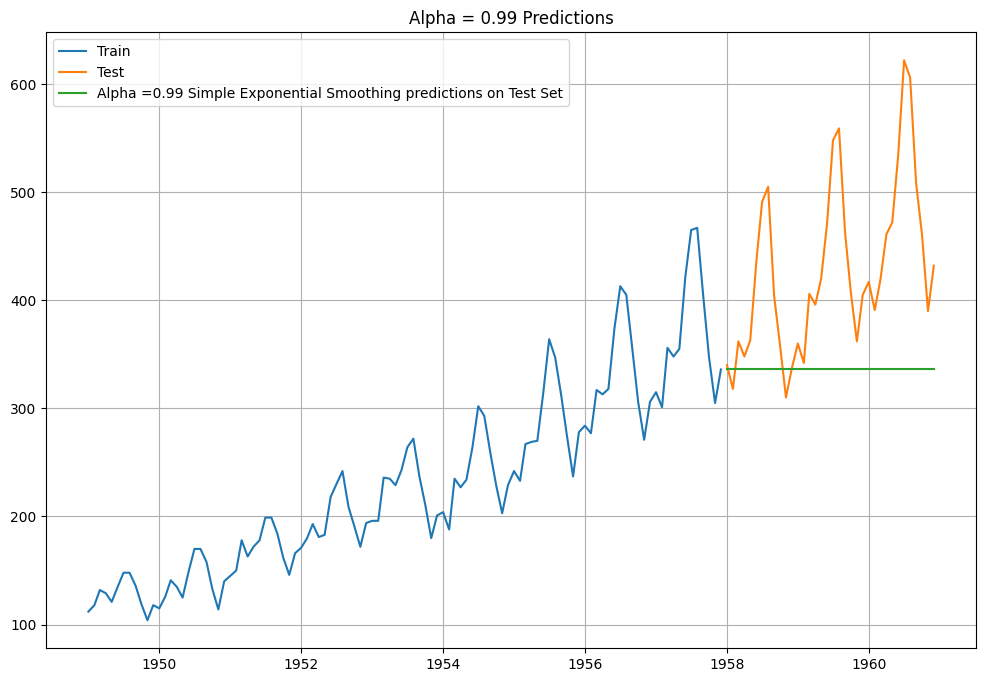

In [23]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.99 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.99 Predictions');

In [24]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [25]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))

SES RMSE: 121.14860934433315


/Users/tanmaireddy/miniconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [26]:
resultsDf = pd.DataFrame({'Test RMSE': [round(em.rmse(test.values,SES_predict.values)[0],2)]},index=['SES - Alpha=0.99'])
resultsDf

,Test RMSE
SES - Alpha=0.99,121.15
